# Prepare Data

In [1]:
#Import everything
import test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from utils import subset_df, plot_in_fig

2024-06-03 17:07:34.966294: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 17:07:34.972118: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 17:07:35.075002: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-03 17:07:37.191373: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
"""Clear Directory"""
#Careful. This will reset all of the resutls that we have collected
###tma.clear_directory(text_curater="MAGAN")

#Converts old way of storing files to the new - if any
#tma.change_old_files_to_new()

'Clear Directory'

In [16]:
"""Practice Tests to Run"""
test = tma.test_manifold_algorithms(csv_file="segmentation.csv", split= "random", percent_of_anchors= [0.2], verbose=2)
#print(f"Anchors : {test.anchors}")
#print(f"KNN range {test.knn_range}")
#test.run_SPUD_tests(kind = ["distance"])
#test.run_DIG_tests(predict = True)
#test.run_NAMA_tests()
#test.run_DTA_tests()
#test.run_SSMA_tests()
#test.run_MAGAN_tests()
#test.run_KNN_tests()
test.run_JLMA_tests()


 
 
---------------------------       Initalizing class with segmentation.csv data       ---------------------------

Splitting the data randomly
Split A features shape: (211, 4)
Split B Features shape (211, 15)
MDS initialized with 4 components
The knn values are: (2, 7, 12, 17, 22, 27, 32, 37, 42, 47)

--------------------------------------   JLMA TESTS /segmentation   --------------------------------------

KNN 2
    Percent of Anchors 0.2
        FOSCTTM 0.515442150895083
        Cross Embedding: 0.11374407582938388
KNN 7
    Percent of Anchors 0.2
        FOSCTTM 0.5399137485680914
        Cross Embedding: 0.09004739336492891
KNN 12
    Percent of Anchors 0.2
        FOSCTTM 0.5511219424541227
        Cross Embedding: 0.061611374407582936
KNN 17
    Percent of Anchors 0.2
        FOSCTTM 0.5468093708586959
        Cross Embedding: 0.06635071090047394
KNN 22
    Percent of Anchors 0.2
        FOSCTTM 0.5514251701444262
        Cross Embedding: 0.05687203791469194
KNN 27
    Percen

True

In [2]:
#Veiwing with DataFrame
df = tma.upload_to_DataFrame()

#Add a combined metric to help see (The closer to 1 the better)
df["Combined_Metric"] = df["Cross_Embedding_KNN"] - df["FOSCTTM"]

#Save the Data Frame
df.to_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", index=False, na_rep='NaN')

In [3]:
#If there is no new data, we could just read in the old csvfile
df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", keep_default_na=False, na_values=['', 'NaN'], index_col= None)

In [7]:
df.sample(5)

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,A_Classification_Score,B_Classification_Score,Combined_Metric
124966,tic-tac-toe,SPUD,9090,even,2.0,0.01,0.10,NaN,NaN,average,similarity,0.490394,0.505219,NaN,NaN,0.014825
463452,blobs,JLMA,3407,even,37.0,0.11,0.10,NaN,NaN,NaN,NaN,0.389611,0.580000,NaN,NaN,0.190389
119896,tic-tac-toe,DIG,9090,turn,22.0,0.03,0.20,full,0.556340,NaN,NaN,0.000002,0.877871,NaN,NaN,0.877868
62988,ionosphere,DIG,1094,random,10.0,0.03,0.30,None,0.148823,NaN,NaN,0.061915,0.874644,NaN,NaN,0.812729
136254,flare1,DIG,1848,random,30.0,0.09,0.15,None,0.191896,NaN,NaN,0.452837,0.888545,NaN,NaN,0.435708


In [8]:
from utils import get_DataFrame_stats
get_DataFrame_stats()

<><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>      DataFrame Statistics        <><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Total Number of instances in DataFrame: 705787


 Method        Lengths
--------      ----------
 MAGAN:          909
 SSMA:          62332
 DTA:          62192
 Nama:          6020
 SPUD:          370857
 DIG:          186401


----------------------       Splits      ----------------------
Total data of random: 160391

 random        Lengths
--------      ----------
 MAGAN:          132
 SSMA:          15883
 DTA:          15833
 Nama:          1461
 SPUD:          76793
 DIG:          50159


Total data of even: 91701

 even        Lengths
--------      ----------
 MAGAN:          184
 SSMA:          5404
 DTA:          5314
 Nama:          527
 SPUD:          47834
 DIG:          31092


Total data of skewed: 162393

 skewed        Lengths
--------      ----------
 MAGAN:          333
 SSMA:          14600
 DTA:    

# Visualization Tests

## Comparing Methods with Box Plots

Observations: While DTA, DIG, SPUD, and NAMA all have similar distributions, both DIG and SPUD have instances that are signifacantly better than the other metrics. DIG preforms the best overall. 

*Note made May 10th (2k+ files taken into  account)

Secondly, MAGAN FOSCTTM is alway very low

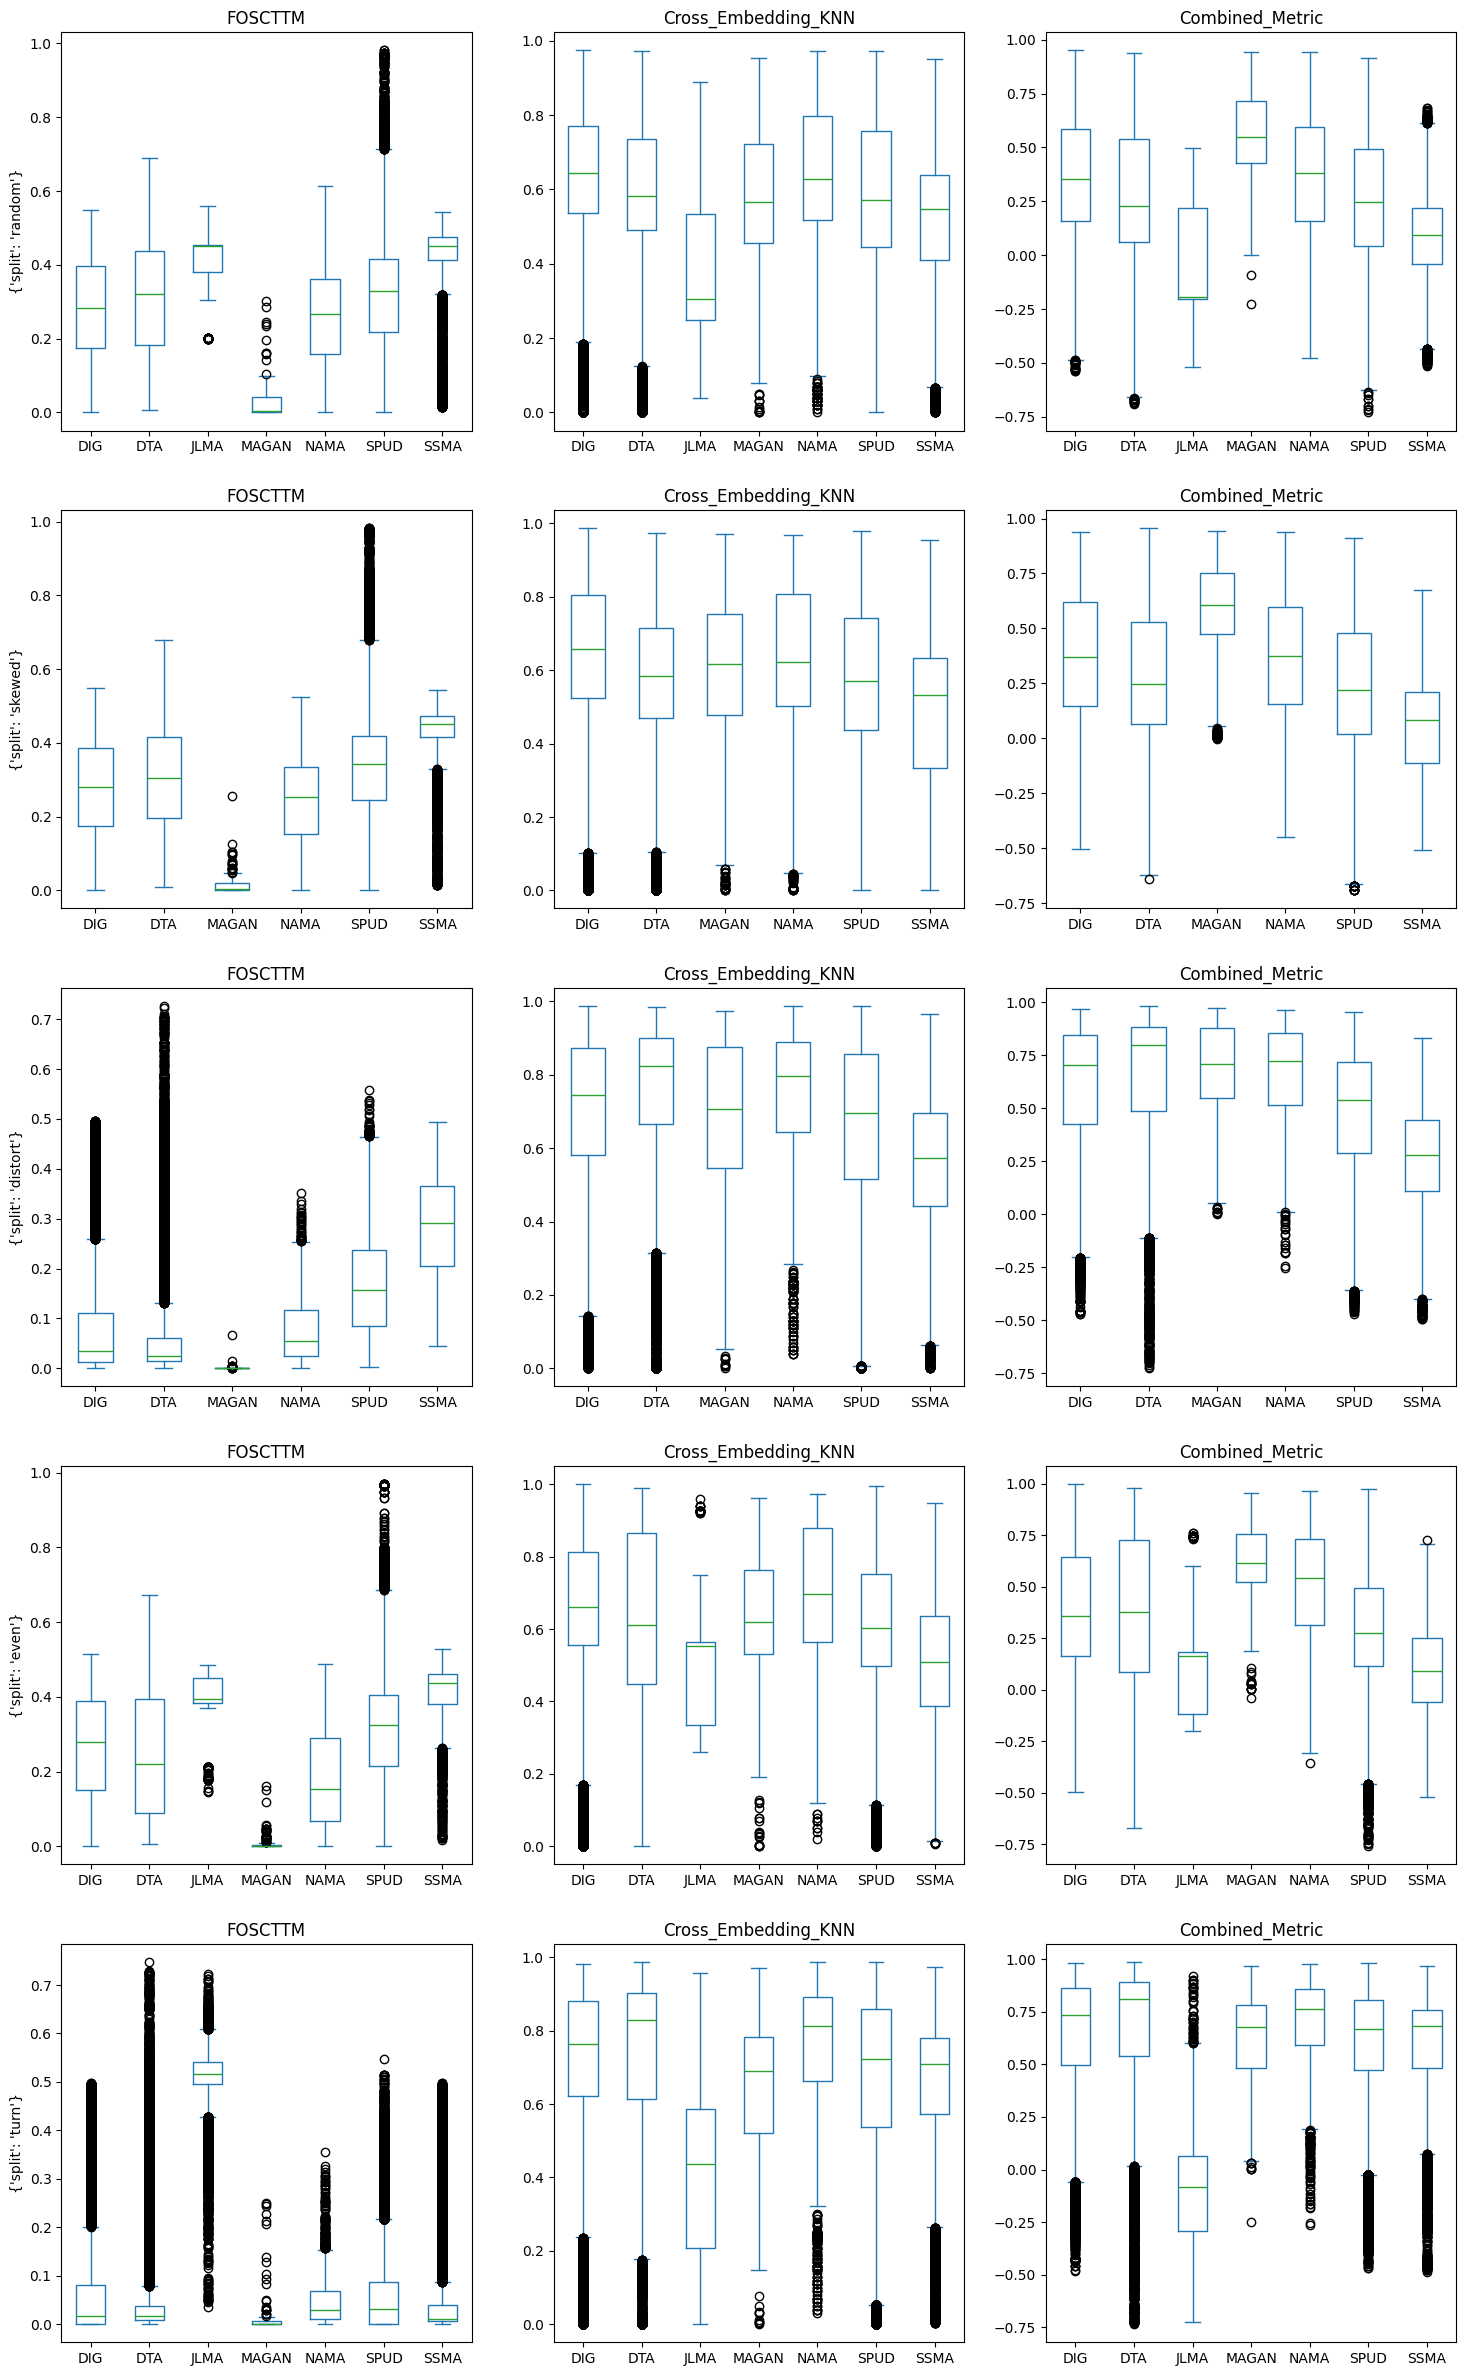

In [9]:
columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }, 
        {"split" : "distort" #, "csv_file" : "iris"
         },
        {"split" : "even" #, "csv_file" : "iris"
         },
         {"split" : "turn" #, "csv_file" : "iris"
         }]

plot_in_fig(columns = columns, rows = rows, by='method', kind = 'box')

## Comparing Arguments within the same Methods

### DIG

We See that Page Rank has little effect on the overall graph data

In [10]:
#If we want to see only a few csv files at a time, we can sub set it here
#df_subset2 = df[df["csv_file"] == "glass"]

#To see all of it combined
df_subset2 = df

#Change the method to DIG
df_subset2 = df_subset2[df_subset2["method"] == "DIG"]

In [11]:
df_subset2.sample(5)

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,A_Classification_Score,B_Classification_Score,Combined_Metric
460888,blobs,DIG,7029,even,23.0,0.07,0.20,off-diagonal,2.553543,NaN,NaN,0.335744,0.676667,NaN,NaN,0.340922
49661,breast_cancer,DIG,2686,skewed,86.0,0.13,0.10,None,0.151985,NaN,NaN,0.241086,0.959943,NaN,NaN,0.718856
595959,iris,DIG,3329,skewed,38.0,0.19,0.30,off-diagonal,0.180071,NaN,NaN,0.169244,0.940000,0.8,0.933333,0.770756
56395,ionosphere,DIG,8582,skewed,18.0,0.05,0.05,full,0.188885,NaN,NaN,0.121062,0.740741,NaN,NaN,0.619678
116744,tic-tac-toe,DIG,9090,even,82.0,0.09,0.05,None,0.339181,NaN,NaN,0.490954,0.524008,NaN,NaN,0.033054


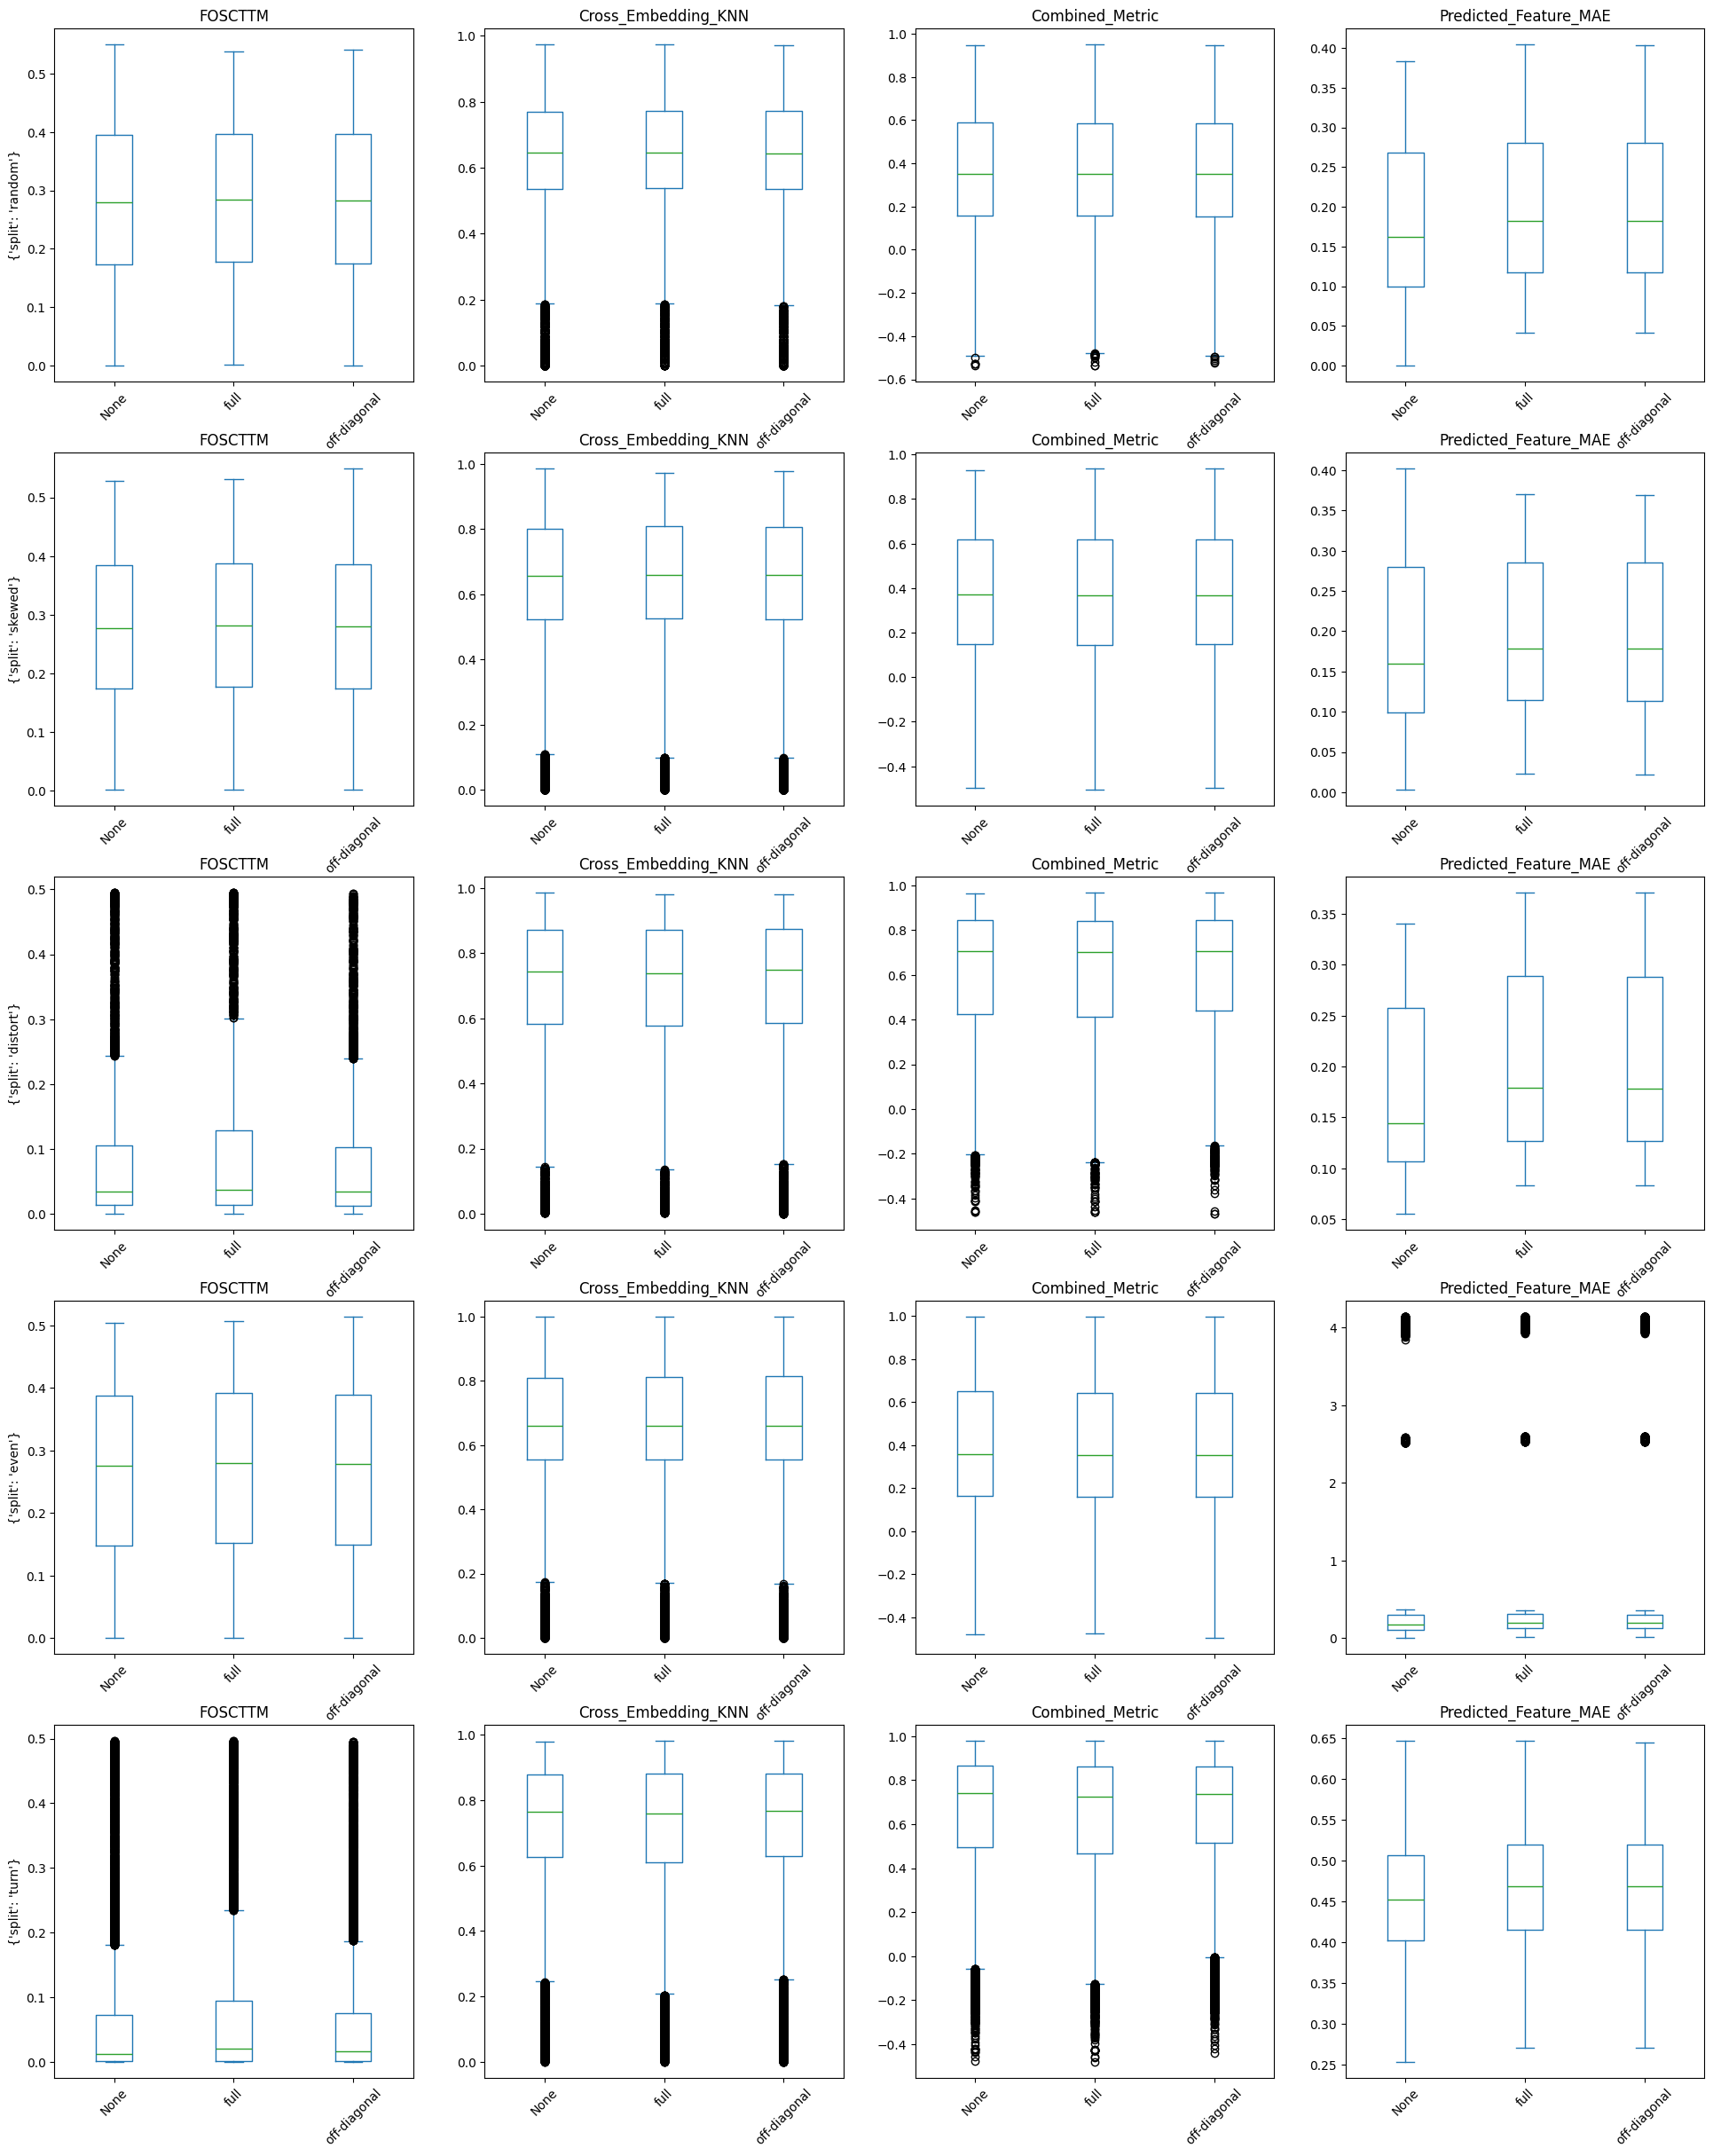

In [12]:

columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}, {"column": "Predicted_Feature_MAE"}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }, 
        {"split" : "distort" #, "csv_file" : "iris"
         },
        {"split" : "even" #, "csv_file" : "iris"
         },
         {"split" : "turn" #, "csv_file" : "iris"
         }]

plot_in_fig(columns = columns, rows = rows, by='Page_Rank', kind = 'box',  rot = 45)

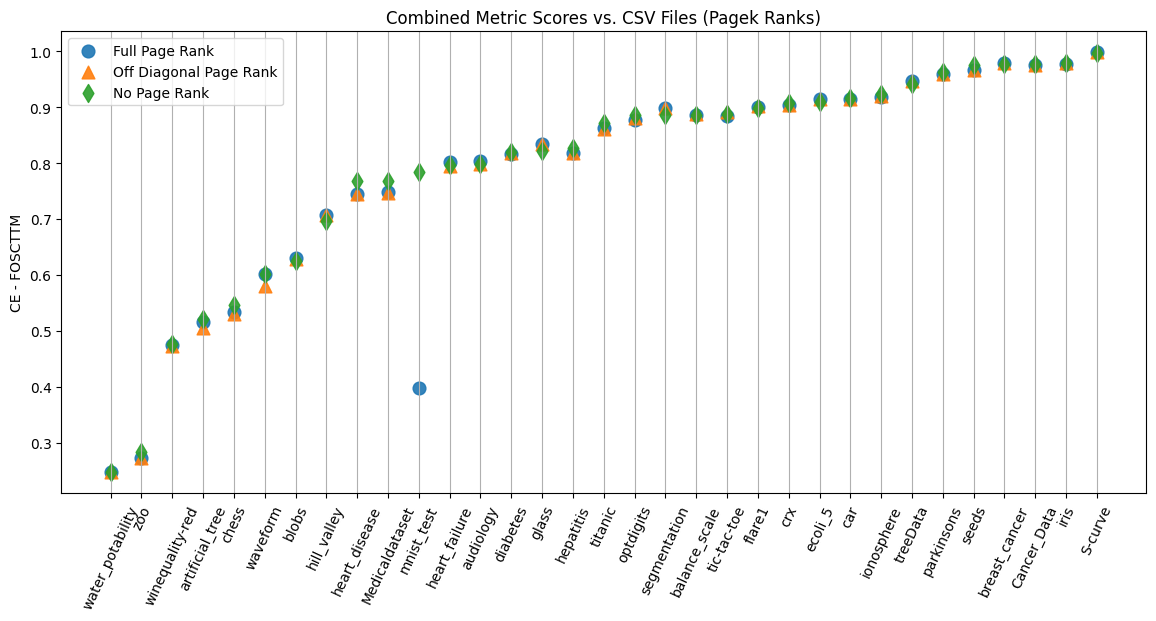

In [13]:
#Create an aggregate DF 
agregate_df = pd.DataFrame({
    'Full_Page_Rank': df[df["Page_Rank"] == "off-diagonal"].groupby("csv_file")["Combined_Metric"].max(),
    'Off-Diagonal_Page_Rank': df[df["Page_Rank"] == "full"].groupby("csv_file")["Combined_Metric"].max(),
    'No_Page_Rank': df[df["Page_Rank"] == "None"].groupby("csv_file")["Combined_Metric"].max()
})


agregate_df = agregate_df.sort_values(by = "No_Page_Rank").reset_index()

#To make it easier to add edits
key_words = {"x" : agregate_df.index,
            "s" : 84,
            "alpha" : .90}

plt.figure(figsize=(14, 6))
ax = plt.scatter(y = agregate_df["Full_Page_Rank"], label = "Full Page Rank", **key_words) #I'm back and forth on the helpfulness of the markers
ax = plt.scatter(y = agregate_df["Off-Diagonal_Page_Rank"], marker = '^', label = "Off Diagonal Page Rank", **key_words)
ax = plt.scatter(y = agregate_df["No_Page_Rank"], marker = 'd', label = "No Page Rank", **key_words)


#Show Legend
plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 65)
plt.title(f"Combined Metric Scores vs. CSV Files (Pagek Ranks)")
plt.ylabel("CE - FOSCTTM")
plt.grid(visible=True, axis = "x")
plt.legend()
plt.show()

### SPUD

Notes:
1. Distance + Avg seems to be the best metric most of the time, although they seem pretty similar

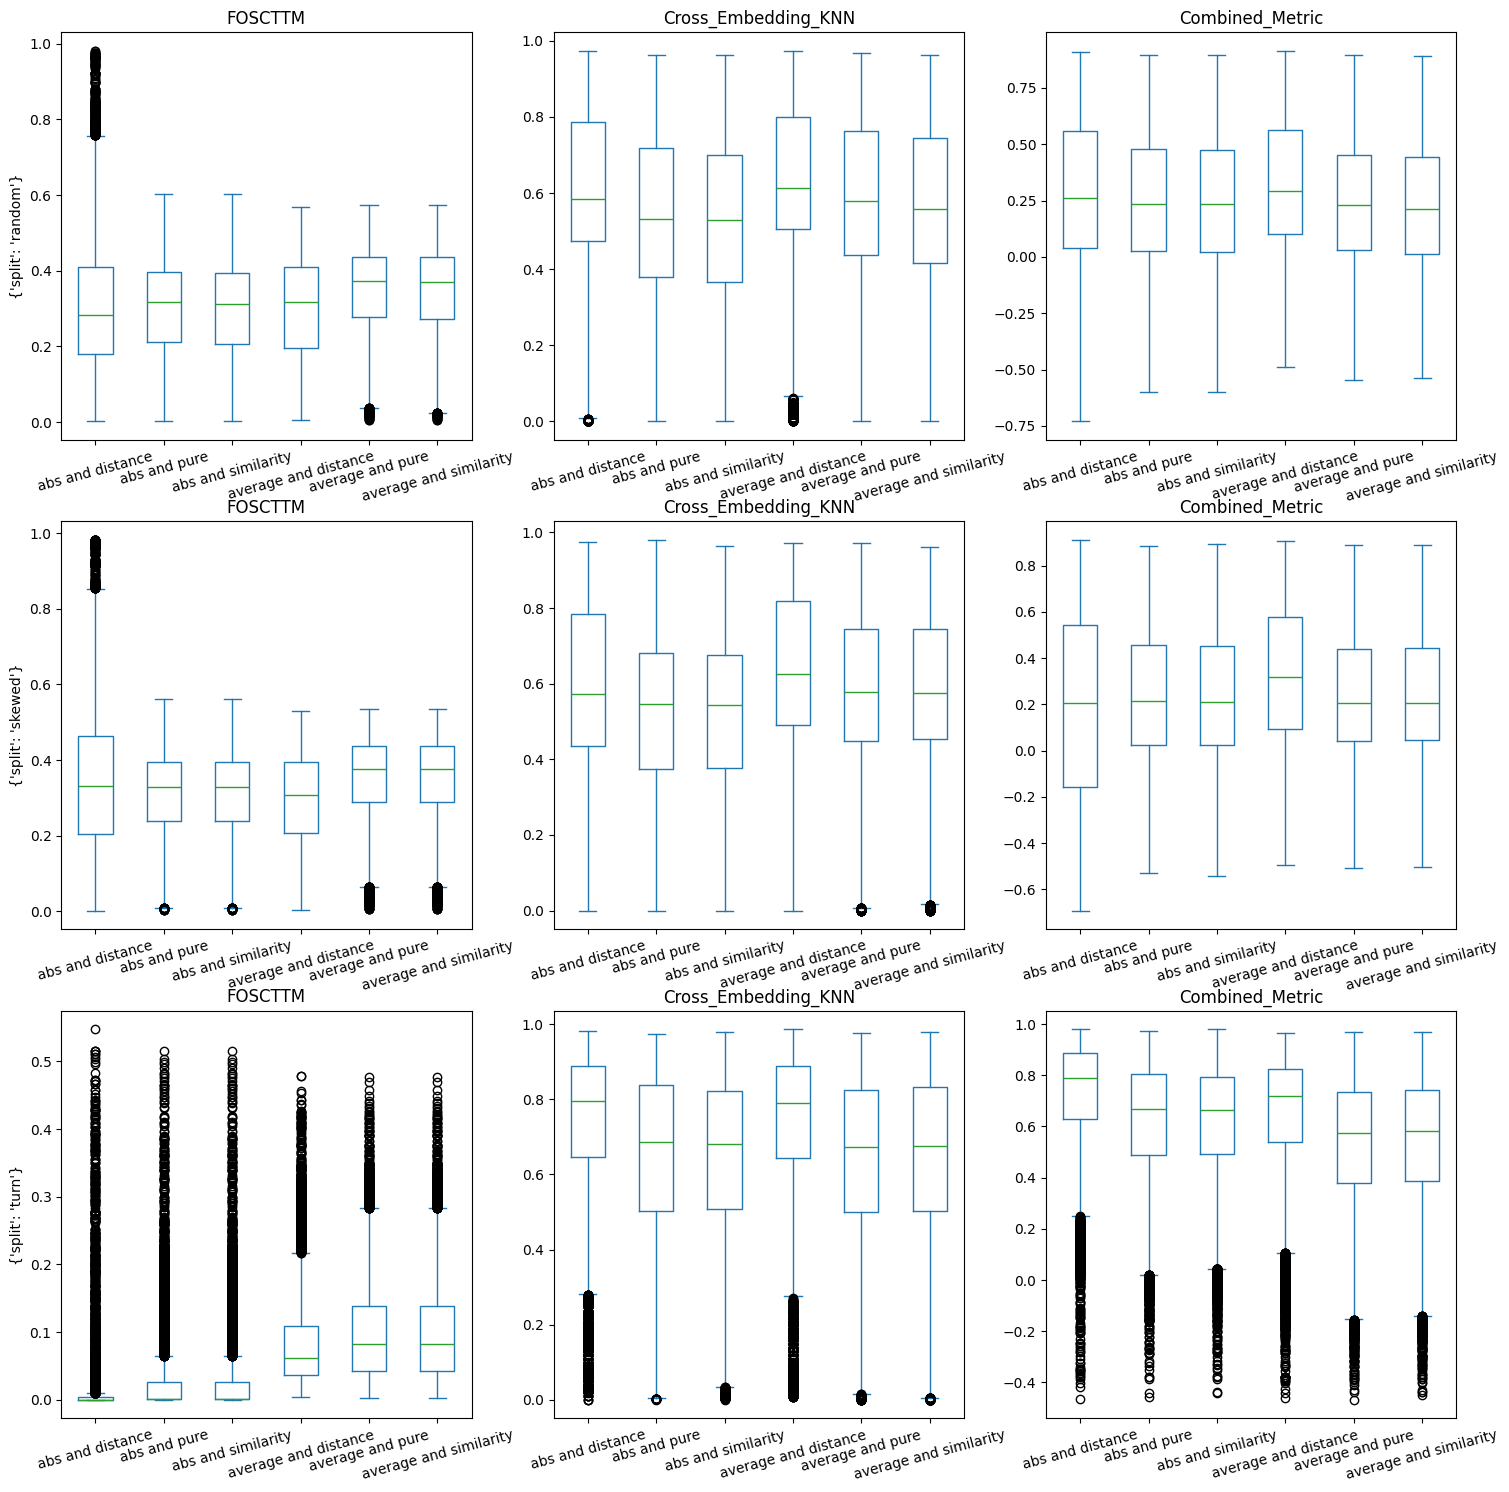

In [14]:
#To make it easier to add edits
key_words = {"figsize": (10, 6),
            "kind": "box",
            "by": "Combined_Arguments",
            "rot": 15}

#Combine DIG argumenst
df_sub = df
df_sub["Combined_Arguments"] = df_sub["Operation"]+ " and " + df_sub["SPUDS_Algorithm"]

columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed"#, "csv_file" : "iris"
         }, 
        {"split" : "turn"#, "csv_file" : "iris"
         }]

plot_in_fig(df = df_sub, columns = columns, rows = rows, **key_words)

## Comparing Methods against CSV Files

DTA seems to be the best on split methods that are made arbitrarily, like the "turn" and the "distort", where as DIG and SPUD preform the best when the data is split "random" or skewed

In [15]:
df.columns

Index(['csv_file', 'method', 'seed', 'split', 'KNN', 'Percent_of_KNN',
       'Percent_of_Anchors', 'Page_Rank', 'Predicted_Feature_MAE', 'Operation',
       'SPUDS_Algorithm', 'FOSCTTM', 'Cross_Embedding_KNN',
       'A_Classification_Score', 'B_Classification_Score', 'Combined_Metric',
       'Combined_Arguments'],
      dtype='object')

In [24]:
def plt_methods_by_CSV_max(df = df, sort_by = "SPUD", metric = "Combined_Metric", return_df =False):
    """df should equal the dataframe. It can be subsetted already
    
    Plots the max of the combined metric for each method to each CSV_File
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].max(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].max(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].max(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")[metric].max(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].max(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].max(),
        'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].max(),
        'Split_A': df.groupby("csv_file")["A_Classification_Score"].max(),
        'Split_B': df.groupby("csv_file")["B_Classification_Score"].max()
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"x" : agregate_df.index,
                "s" : 96,
                "alpha" : .90}

    plt.figure(figsize=(16, 6))
    ax = plt.scatter(y = agregate_df["DTA"], marker = "d", label = "DTA", **key_words)
    ax = plt.scatter(y = agregate_df["SPUD"], label = "SPUD", **key_words) 
    ax = plt.scatter(y = agregate_df["DIG"], marker = '^', label = "DIG", **key_words)
    ax = plt.scatter(y = agregate_df["SSMA"],  marker = 'x', label = "SSMA", **key_words)
    ax = plt.scatter(y = agregate_df["NAMA"], marker = '*', label = "NAMA", **key_words)
    ax = plt.scatter(y = agregate_df["MAGAN"], marker = 'h', color = "black", label = "MAGAN", **key_words)
    ax = plt.scatter(y = agregate_df["JLMA"], marker = 'o', label = "JLMA", **key_words)


    #Plot the ground truths
    ax = plt.scatter(y = agregate_df["Split_A"], marker = '.', label = "Split A", **key_words)
    ax = plt.scatter(y = agregate_df["Split_B"], marker = '_', label = "Split B", **key_words)


    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"{metric} Scores vs. CSV Files (MAX)")
    plt.ylabel(metric)
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

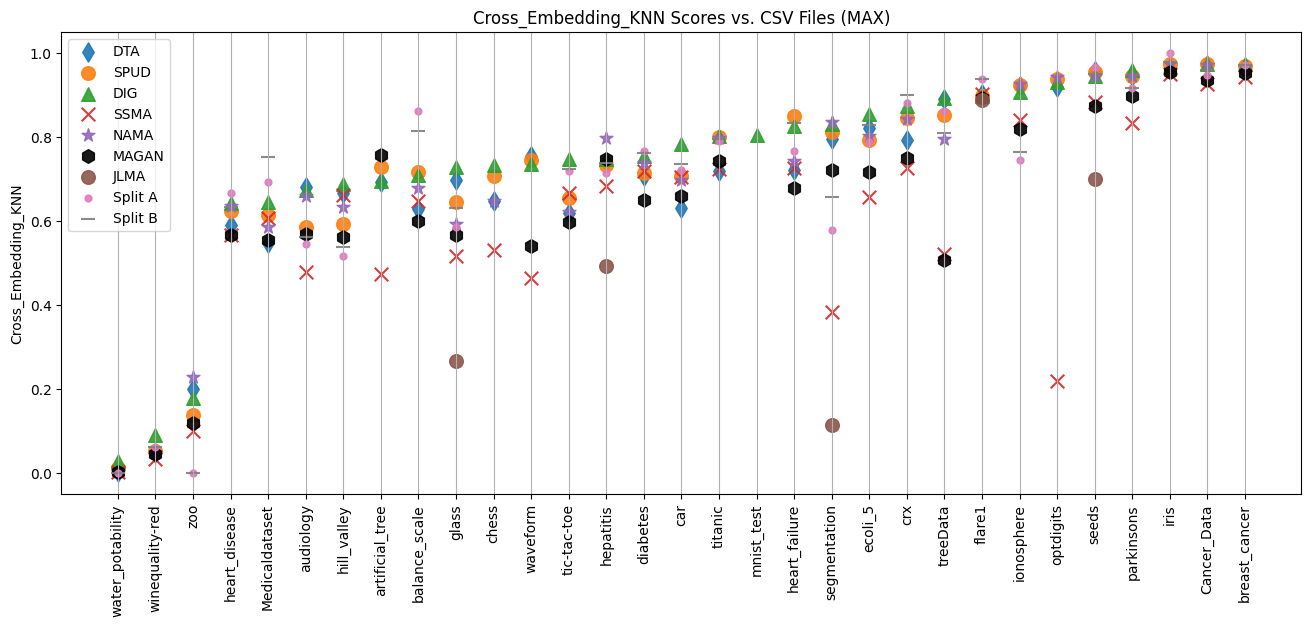

In [40]:
#plt_methods_by_CSV_max(df = df, sort_by = "DIG") #This shows all of the data gather
plt_methods_by_CSV_max(df = subset_df(df, split = "random"), metric = "Cross_Embedding_KNN", sort_by="DIG")

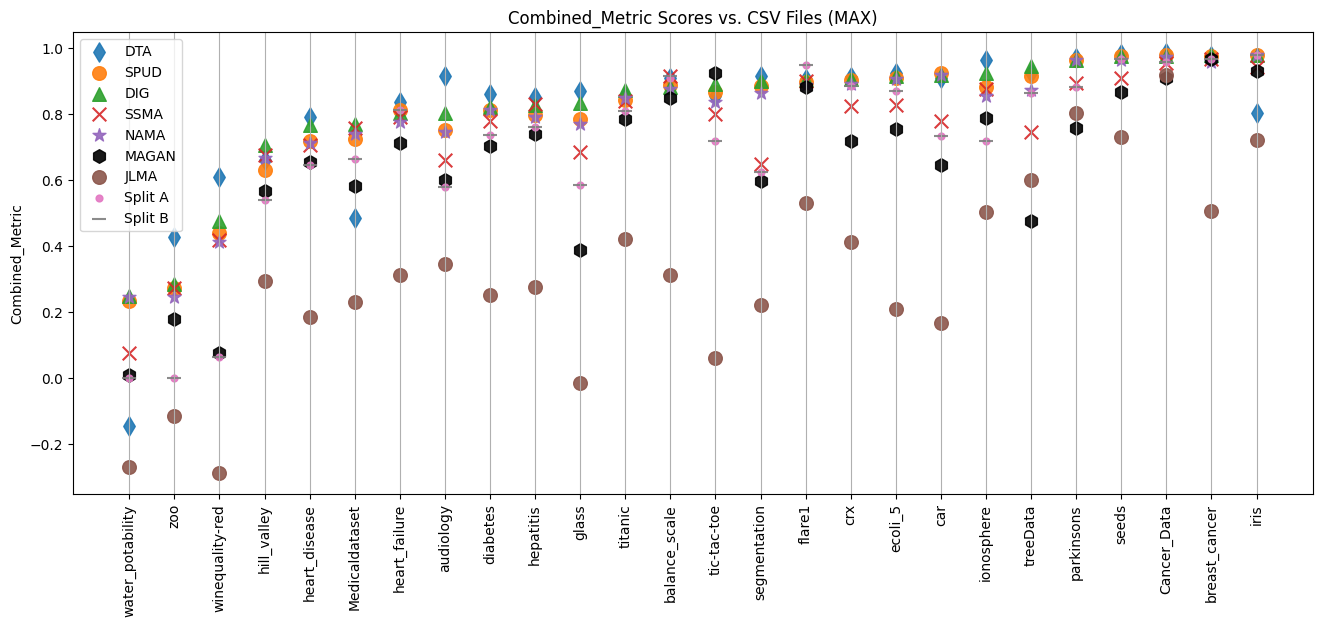

In [27]:
plt_methods_by_CSV_max(df = subset_df(df, split = "turn"), sort_by="DIG")

In [37]:
def plt_methods_by_CSV_mean(df = df, sort_by = "SPUD", metric = "Combined_Metric", return_df = False):
    """Plots 95 percent confident intervals for each method against csv files
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].mean(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].mean(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].mean(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")[metric].mean(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].mean(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].mean(),
        'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].mean(),
        'Split_A': df.groupby("csv_file")["A_Classification_Score"].mean(),
        'Split_B': df.groupby("csv_file")["B_Classification_Score"].mean()
    })

    #Calculate error bars
    err_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].std(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].std(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].std(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")[metric].std(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].std(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].std(),
        'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].std(),
        'Split_A': df.groupby("csv_file")["A_Classification_Score"].std(),
        'Split_B': df.groupby("csv_file")["B_Classification_Score"].std()
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"ms" : 8,
                "alpha" : .75}

    plt.figure(figsize=(20, 6))
    ax = plt.errorbar(x = agregate_df.index - 0.1, y = agregate_df["DTA"], yerr = err_df["DTA"], fmt = ".", label = "DTA", **key_words)
    ax = plt.errorbar(x = agregate_df.index, y = agregate_df["SPUD"], yerr = err_df["SPUD"], fmt = ".", label = "SPUD", **key_words) 
    ax = plt.errorbar(x = agregate_df.index + 0.2, y = agregate_df["DIG"], yerr = err_df["DIG"],fmt = '.', label = "DIG", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.1, y = agregate_df["SSMA"], yerr = err_df["SSMA"],fmt = '.', label = "SSMA", **key_words)
    ax = plt.errorbar(x = agregate_df.index - 0.2, y = agregate_df["NAMA"], yerr = err_df["NAMA"],fmt = '.', label = "NAMA", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.3, y = agregate_df["MAGAN"], yerr = err_df["MAGAN"],fmt = '.', color = "black", label = "MAGAN", **key_words)
    ax = plt.errorbar(x = agregate_df.index, y = agregate_df["JLMA"], yerr = err_df["JLMA"], fmt = ".", label = "JMLA", **key_words) 



    ax = plt.errorbar(x = agregate_df.index+ 0.4, y = agregate_df["Split_A"], yerr = err_df["Split_A"], fmt = "_", label = "Split_A", **key_words) 
    ax = plt.errorbar(x = agregate_df.index - 0.3, y = agregate_df["Split_B"], yerr = err_df["Split_B"], fmt = "_", label = "Split_B", **key_words) 


    plt.ylim([-0.3, 1])

    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"{metric} Scores vs. CSV Files (MEAN)")
    plt.ylabel(metric)
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

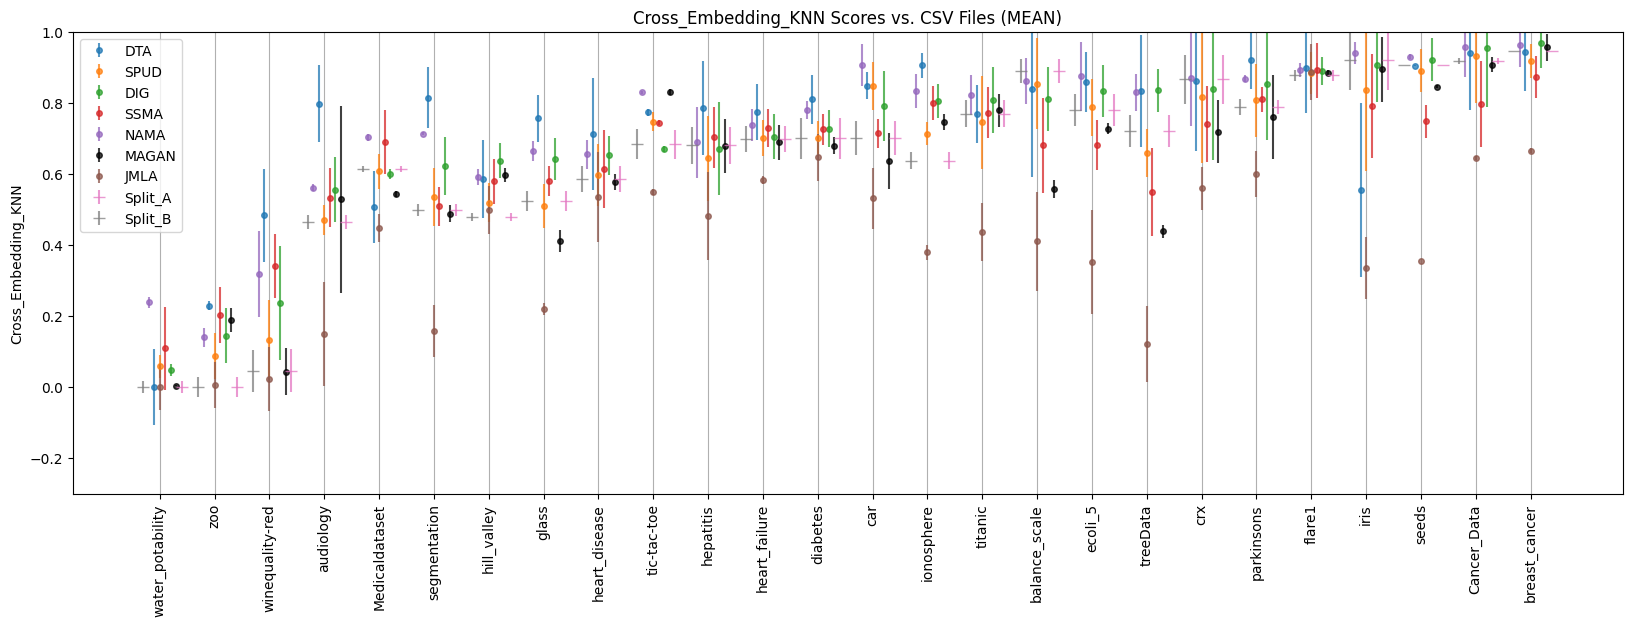

In [38]:
#plt_methods_by_CSV_mean(sort_by="NAMA") #This shows all of the data gather
plt_methods_by_CSV_mean(df = subset_df(df, split = "turn"), metric = "Cross_Embedding_KNN", sort_by="DIG")

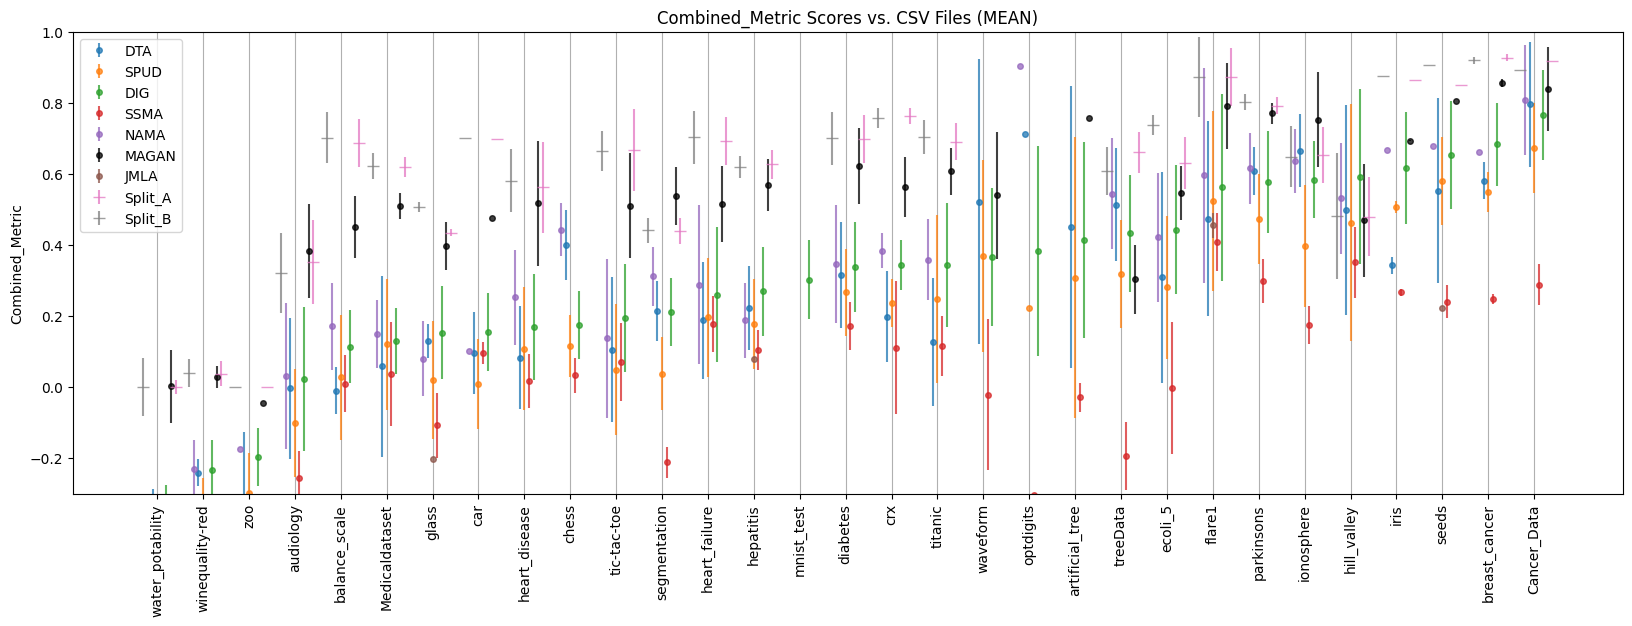

In [39]:
plt_methods_by_CSV_mean(df = subset_df(df, split = "random"), sort_by="DIG")

### Rankings
TODO: Have results for different splits

In [30]:
df.columns

Index(['csv_file', 'method', 'seed', 'split', 'KNN', 'Percent_of_KNN',
       'Percent_of_Anchors', 'Page_Rank', 'Predicted_Feature_MAE', 'Operation',
       'SPUDS_Algorithm', 'FOSCTTM', 'Cross_Embedding_KNN',
       'A_Classification_Score', 'B_Classification_Score', 'Combined_Metric',
       'Combined_Arguments'],
      dtype='object')

In [44]:
#### STILL WORKING ON THE UPDATES TO THIS FUNCTION ____ TRYING TO IMPLEMENT A MEASURE OF DISTANCE FROM SPLITS

def get_ranks(show_more = False, **kwargs):
    #Sort by Split
    split_df = subset_df(df=df, **kwargs)

    if "split" in kwargs.keys():
        split = kwargs["split"]
    else:
        split = "No"

    #Sort Df by CSV
    csv_df = plt_methods_by_CSV_max(df = split_df, return_df=True)
    df_ranked = csv_df.drop(columns= ["csv_file", "Split_A", "Split_B"]).rank(ascending=False, method='max', axis = 1)


    #This shows which method has preformed the Best overall
    print(f"Ranked across {split} Split\n-----------------------\n{df_ranked.mean(axis = 0).sort_values(ascending=True)}")
    if show_more:
        print(f"\n \nSTD of Ranks across {split} Split\n----------------------------\n{df_ranked.std(axis = 0).sort_values(ascending=True)}")
        print(f"\n\nNumber of times each Method did best for each CSV\n--------------------------------------------------\n{csv_df.drop(columns= ['csv_file']).idxmax(axis = 1).value_counts().sort_values(ascending=False)}")
    #print(f"\n \nDistance from Split_A and Split_B with a {split} Split\n----------------------------------------------------------\n{df_ranked[""].std(axis = 0).sort_values(ascending=True)}")

    #Print out the distance from the Split_a and Split b baseling

    #Get th csv file with Cross embedding as th max
    csv_df = plt_methods_by_CSV_max(df = split_df, return_df=True, metric = "Cross_Embedding_KNN").fillna(0)
    d1 = len(csv_df)
    columns = csv_df.columns[1:-2]

    #Drop the SPlits from the df
    methods_df = csv_df.drop(columns=["csv_file", "Split_A", "Split_B"])

    #Create the baseline Scalar, and drop NaN
    baseline = np.reshape(csv_df.values[:, -2:].max(axis = 1), newshape = (d1,1))

    #Print out average
    print(f"\n\n\n          Distance of CE from Split A and Split B baseline on Average\n------------------------------------------------------------------------------")

    #Calculate the values
    print(pd.DataFrame(np.reshape(np.mean(methods_df.to_numpy() - baseline, axis = 0), newshape = (1,7)), columns = columns))

    if show_more:
        print(f"\n\n\n               Distance of CE from Split A and Split B baseline\n------------------------------------------------------------------------------")

        #Calculate the values
        print(pd.DataFrame(methods_df.to_numpy() - baseline, columns = columns, index = csv_df["csv_file"]))



In [45]:
#NOTE: DIG has the best Preformance :) --> The Rankings reflect often how well each will be away from the main one
get_ranks()

Ranked across No Split
-----------------------
DIG      2.151515
DTA      2.187500
SPUD     3.187500
NAMA     3.700000
SSMA     4.687500
MAGAN    4.933333
JLMA     6.928571
dtype: float64



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA      SPUD       DIG      NAMA      JLMA
0  0.072405  0.036318  0.173555  0.170828  0.199966  0.118723 -0.091592


In [46]:
get_ranks(split = "random")

Ranked across random Split
-----------------------
MAGAN    2.214286
DIG      2.322581
NAMA     3.035714
SPUD     3.333333
DTA      3.866667
SSMA     5.733333
JLMA     7.000000
dtype: float64



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA      SPUD       DIG     NAMA      JLMA
0 -0.010988 -0.014843  0.087032  0.098837  0.147969  0.04885 -0.514931


In [47]:
get_ranks(split = "even")

Ranked across even Split
-----------------------
DIG      2.107143
MAGAN    2.142857
NAMA     2.722222
SPUD     3.600000
DTA      3.722222
SSMA     5.888889
JLMA     6.500000
dtype: float64



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA     SPUD       DIG      NAMA      JLMA
0 -0.279201 -0.039966 -0.215223 -0.01364  0.044577 -0.204515 -0.608584


In [48]:
get_ranks(split = "skewed")

Ranked across skewed Split
-----------------------
DIG      2.153846
MAGAN    2.269231
NAMA     3.038462
SPUD     3.769231
DTA      4.038462
SSMA     5.730769
JLMA          NaN
dtype: float64



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA      SPUD       DIG      NAMA      JLMA
0 -0.075167 -0.097415 -0.007485  0.013443  0.052871  0.003257 -0.698574


In [49]:
get_ranks(split = "distort")

Ranked across distort Split
-----------------------
DTA      1.884615
DIG      2.730769
NAMA     2.884615
SPUD     3.576923
MAGAN    4.000000
SSMA     5.923077
JLMA          NaN
dtype: float64



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA      SPUD       DIG      NAMA      JLMA
0 -0.042213 -0.002869  0.113422  0.093536  0.084598  0.092823 -0.700818


In [50]:
get_ranks(split = "turn")

Ranked across turn Split
-----------------------
DIG      2.076923
DTA      2.115385
SPUD     3.000000
NAMA     4.038462
SSMA     4.192308
MAGAN    5.730769
JLMA     6.884615
dtype: float64



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
      SSMA     MAGAN       DTA      SPUD       DIG      NAMA      JLMA
0  0.06149 -0.029406  0.128953  0.109876  0.119428  0.099556 -0.064599


## Comparing Percent of anchors and KNN values

In [51]:
def line_plot_methods(argument = "Percent_of_Anchors", **kwargs):
    "subset should equal none or the csv file name"

    #Subset the data
    df_subset = subset_df(df, **kwargs)

    #Create figure
    plt.figure(figsize=(14,7))

    #Plot the graphs
    plt.plot(df_subset[df_subset["method"] == "SSMA"].groupby(argument)["Combined_Metric"].mean(), label = "SSMA")
    plt.plot(df_subset[df_subset["method"] == "DTA"].groupby(argument)["Combined_Metric"].mean(), label = "DTA")
    plt.plot(df_subset[df_subset["method"] == "DIG"].groupby(argument)["Combined_Metric"].mean(), label = "DIG")
    plt.axhline(df_subset[df_subset["method"] == "MAGAN"]["Combined_Metric"].mean(), label = "MAGAN", color = "black")


    #Show different SPUD arguments
    plt.plot(df_subset[df_subset["Operation"] == "average"].groupby(argument)["Combined_Metric"].mean(), label = "SPUD - Avg")
    plt.plot(df_subset[df_subset["Operation"] == "abs"].groupby(argument)["Combined_Metric"].mean(), label = "SPUD - Abs")

    if argument != "Percent_of_KNN":
        plt.plot(df_subset[df_subset["method"] == "NAMA"].groupby(argument)["Combined_Metric"].mean(), label = "NAMA")



    #Make it pretty
    plt.xlabel(argument)
    plt.ylabel("Combined Metric Score (CE - FOSCTTM)")
    plt.legend()
    plt.title("Methods Together")

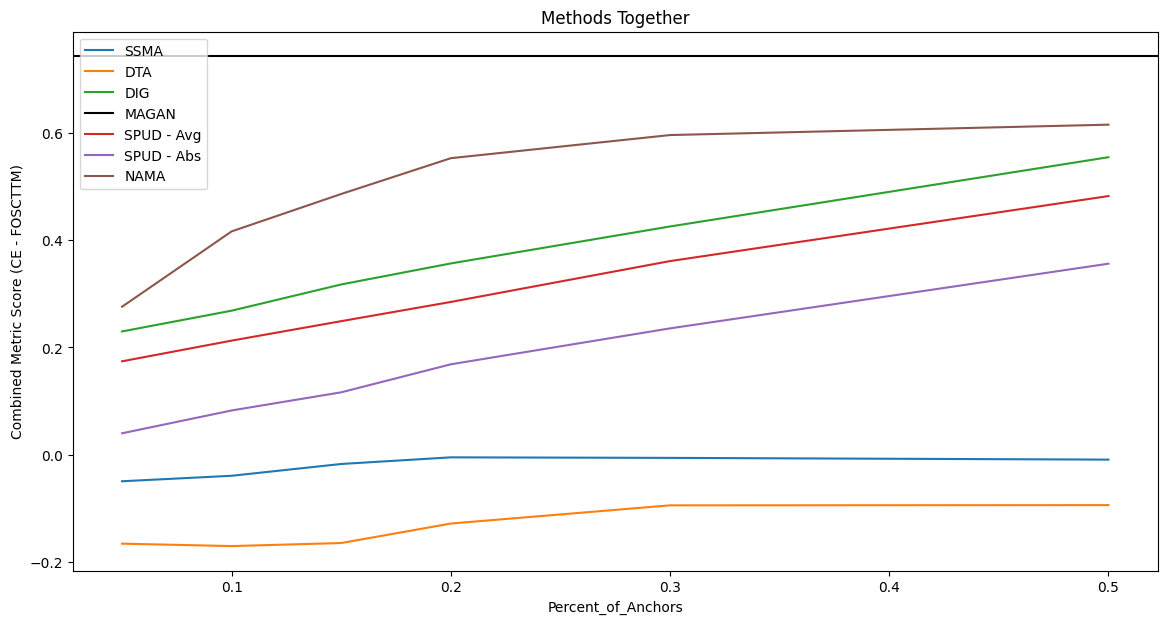

In [52]:
line_plot_methods(csv_file = "blobs", split = "even")

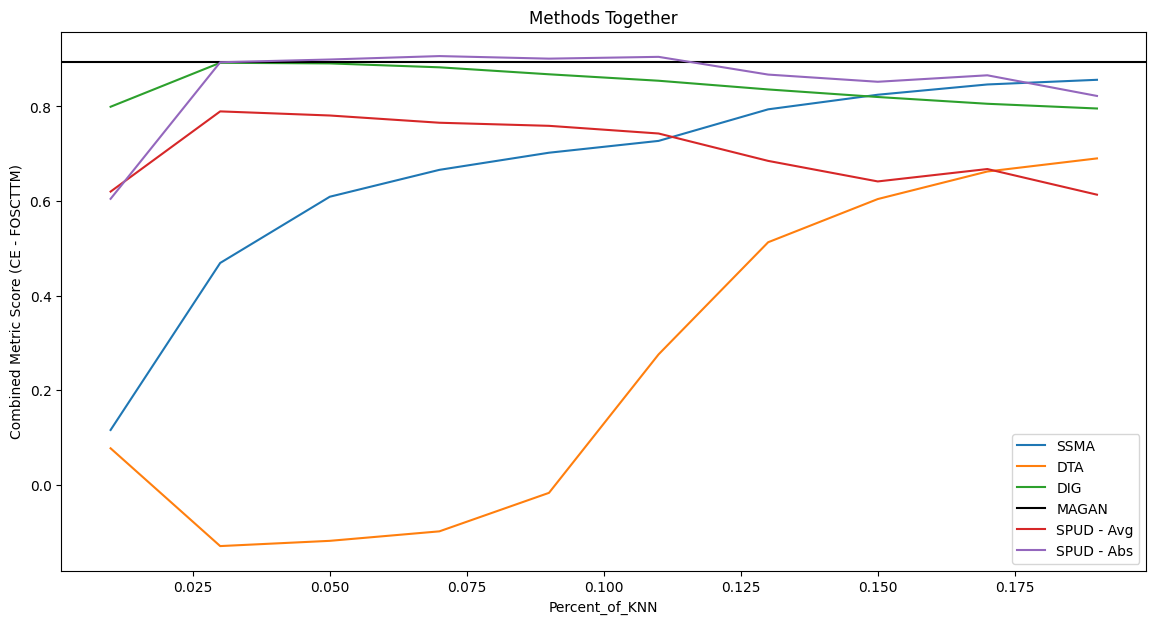

In [53]:
line_plot_methods(argument = "Percent_of_KNN", split = "turn", csv_file = "iris")

## Plotting the Embeddings

Data Sets that dont make sense:
Flare1 - Most of the points belong to the same class, so the CE will be high regardless of alignment

In [54]:
visual_test = tma.test_manifold_algorithms(csv_file="seeds.csv", split= "random", percent_of_anchors= [0.1], verbose=2)


 
 
---------------------------       Initalizing class with titanic.csv data       ---------------------------

Splitting the data randomly
Split A features shape: (712, 6)
Split B Features shape (712, 1)
MDS initialized with 2 components
The knn values are: (2, 17, 32, 47, 62, 77, 92, 107, 122, 137)


In [55]:
visual_test.plot_embeddings(knn = 5)

Percent of anchors used: 0.1
The amount of Nearest Neighbors: 5


/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 55 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 1780 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/yunity/arusty/Graph-Manifold-Alignment/Python_Files/DIG.py:118: RuntimeWarning: invalid value encountered in divide
  return matrix / row_sums[:, np.newaxis]
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 55 pairs of samples. Consider removing duplicates to av

# Time Comparisions Below

In [ ]:
#Print the complexity of CSV files and the time it takes
time_df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Time_DataFrame.csv").sort_values(by = str("iris.csv"), ignore_index=True)

#Add the amount of features for each csv file
for csv_file in time_df.columns:

    #Continue the loop if the header is Methods
    if csv_file == "Methods":

        #Create dictionaries to store feature count and instance count
        feature_dict = {"Methods" : 0}
        instance_dict = {"Methods" : "Feature Count"}
        complexity_dict = {"Methods" : "Complexity"}

        continue

    #Calulate the spcial cases
    elif csv_file == "S-curve":
        #Count Features
        feature_dict[csv_file] = 600

        #Count Instances
        instance_dict[csv_file] = 3
        complexity_dict[csv_file] = 1800

        continue

    #Calulate the spcial cases
    elif csv_file == "blobs":
        #Count Features
        feature_dict[csv_file] = 300

        #Count Instances
        instance_dict[csv_file] = 2
        complexity_dict[csv_file] = 600

        continue


    file_path = "/yunity/arusty/Graph-Manifold-Alignment/CSV Files/" + csv_file

    #Read file
    df = pd.read_csv(file_path)

    #Count Features
    feature_dict[csv_file] = len(df)

    #Count Instances
    instance_dict[csv_file] = len(df.columns)

    #Calculate complexity 
    complexity_dict[csv_file] = len(df) * len(df.columns)

#Append the Dictionaries
time_df = time_df._append(feature_dict, ignore_index=True)
time_df = time_df._append(instance_dict, ignore_index=True)
time_df = time_df._append(complexity_dict, ignore_index=True)


#Veiw the DataFrame
time_df.T.sort_values(by = 6).T

,Methods,zoo.csv,hepatitis.csv,iris.csv,audiology.csv,parkinsons.csv,seeds.csv,segmentation.csv,glass.csv,heart_disease.csv,...,crx.csv,breast_cancer.csv,titanic.csv,diabetes.csv,tic-tac-toe.csv,Medicaldataset.csv,treeData.csv,winequality-red.csv,car.csv,water_potability.csv
0,DIG,2.051146,3.673588,3.401358,6.11107,6.721155,6.336899,7.850724,5.886319,21.008766,...,96.169371,111.183804,79.618065,169.862753,247.272338,333.91487,606.335758,670.495568,623.620235,713.969006
1,SPUD,1.979575,3.642993,3.596051,6.817885,6.064839,5.099518,8.601908,8.767957,16.608557,...,91.935259,65.580449,49.325496,86.465402,183.209855,364.731992,365.956391,383.02885,473.174882,695.340593
2,SSMA,1.159722,4.248523,4.294494,6.804995,8.124955,11.139338,12.805081,14.13043,28.532746,...,155.000047,198.180893,76.844366,98.089042,276.15585,277.443343,506.298484,666.250582,750.995811,994.201673
3,DTA,1.541715,3.795742,4.622846,9.17517,9.272984,11.307132,11.840308,11.141553,35.958692,...,161.512695,228.14914,82.645041,202.853388,277.613282,298.365653,565.135435,698.865259,760.982209,306.629771
4,NAMA,2.732113,4.872489,6.227232,14.216228,16.270395,10.448334,15.465682,19.214126,45.309474,...,428.882806,458.92959,441.442726,627.065093,1195.106548,3039.580123,3976.05421,5446.704218,6871.173276,10911.287093
5,MAGAN,36.202,60.454023,72.027937,66.887187,63.486195,56.742175,42.748242,61.843572,41.687702,...,95.593119,103.365419,54.630012,60.786258,113.20653,27.341562,497.965705,32.816214,407.051648,653.820618
6,0,101.0,138.0,150.0,190.0,195.0,199.0,211.0,214.0,297.0,...,664.0,699.0,712.0,768.0,958.0,1319.0,1440.0,1599.0,1728.0,2011.0
7,Feature Count,18.0,16.0,5.0,68.0,23.0,8.0,20.0,10.0,14.0,...,15.0,10.0,8.0,9.0,10.0,9.0,61.0,12.0,7.0,11.0
8,Complexity,1818.0,2208.0,750.0,12920.0,4485.0,1592.0,4220.0,2140.0,4158.0,...,9960.0,6990.0,5696.0,6912.0,9580.0,11871.0,87840.0,19188.0,12096.0,22121.0


In [ ]:
time_df.T.sort_values(by = 6).T.drop(columns = ["Methods"]).mean(axis = 1).sort_values()

7       19.321429
1      109.261995
5      110.922727
0      146.838497
3       149.59003
2      162.225399
6      628.321429
4     1237.483256
8    11880.642857
dtype: object